In [1]:
import pandas as pd
import re
import numpy as np
import os
import tensorflow as tf

In [2]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 668.3 MB 12.6 MB/s
     |████████████████████████████████| 462 kB 7.8 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/RashidMaulana/Anticede/main/Machine%20Learning/data/datatest.csv')
df.head()

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik
0,1 BUKAN CuMa SPANDUK PROF VIDEO2 ORASI MEREKA ...,0,0,1,1
1,gua sange gatel yah tetek memeknya di ranjang ...,1,0,0,0
2,pertama kali denger lagunya enak bangitu in da...,0,0,0,0
3,astajim ini pasti yang kasih penghargaan ke ib...,0,0,0,1
4,kalo keberagamannya ada tapi ga dianggep banya...,0,0,0,0


In [4]:
df.tail()

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik
4995,bad mood banget sumpah,0,0,0,0
4996,"circle sekolah islam malang is weird af, they ...",0,0,0,1
4997,"Megawati: kalau aku sudah tidak ada, piye yo b...",0,0,0,0
4998,Dari sini rakyat bisa menilai betapa kerdilnya...,0,0,0,0
4999,Tenggelamkan ! Ini dalang adanya politik SARA ...,0,0,0,1


In [5]:
df.iloc[0:1,]

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik
0,1 BUKAN CuMa SPANDUK PROF VIDEO2 ORASI MEREKA ...,0,0,1,1


In [6]:
df.iloc[0]['original_text']

'1 BUKAN CuMa SPANDUK PROF VIDEO2 ORASI MEREKA BUKU2 MEREKA dan lain lain ITU sudah SaNGAT jelas SaYa HERAN SaMa RaKYAT2 YanG MASIH TOLOL Udah Jelas2 ADA NIAT DaRi HTI YanG INGIN TEGAKKAN KHILAFAH & GANTI NKRI MASIH NGELES GAK ADA LAH MAU TEGAKKAN KHILAFAH AJA MUNAFIK APANYA KHILAFAH'

In [7]:
df[df.columns[1:]].iloc[0:3]

,pornografi,sara,radikalisme,pencemaran_nama_baik
0,0,0,1,1
1,1,0,0,0
2,0,0,0,0


In [8]:
from tensorflow.keras.layers import TextVectorization
a = df['original_text']
b = df[df.columns[1:]].values


In [9]:
df.columns

Index(['original_text', 'pornografi', 'sara', 'radikalisme',
       'pencemaran_nama_baik'],
      dtype='object')

In [10]:
df['original_text']

0       1 BUKAN CuMa SPANDUK PROF VIDEO2 ORASI MEREKA ...
1       gua sange gatel yah tetek memeknya di ranjang ...
2       pertama kali denger lagunya enak bangitu in da...
3       astajim ini pasti yang kasih penghargaan ke ib...
4       kalo keberagamannya ada tapi ga dianggep banya...
                              ...                        
4995                               bad mood banget sumpah
4996    circle sekolah islam malang is weird af, they ...
4997    Megawati: kalau aku sudah tidak ada, piye yo b...
4998    Dari sini rakyat bisa menilai betapa kerdilnya...
4999    Tenggelamkan ! Ini dalang adanya politik SARA ...
Name: original_text, Length: 5000, dtype: object

In [11]:
df[df.columns[1:]].values

array([[0, 0, 1, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

In [12]:
MAX_WORD = 20000
MAX_SEQ = 1000

In [13]:
kalimat = TextVectorization(max_tokens=MAX_WORD, output_sequence_length=1000, output_mode='int')

In [14]:
kalimat.adapt(a.values)

In [15]:
kalimat('anjing kadal')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 150, 4225])>

In [16]:
kalimat.get_vocabulary()

['',
 '[UNK]',
 'yang',
 'dan',
 'di',
 'itu',
 'ini',
 'ada',
 'orang',
 'dari',
 'dengan',
 'ya',
 'jadi',
 'presiden',
 'tapi',
 'juga',
 'ga',
 'gak',
 'bisa',
 'untuk',
 'aja',
 'tidak',
 'sama',
 'saya',
 'jokowi',
 'ke',
 'gue',
 'kalo',
 'nya',
 'mau',
 'agama',
 'lagi',
 'dia',
 'aku',
 'lu',
 'apa',
 'indonesia',
 'islam',
 'kita',
 'karena',
 'kalau',
 'mereka',
 'sudah',
 'bukan',
 'jangan',
 'udah',
 'dalam',
 'akan',
 'lain',
 'lo',
 'lebih',
 'pada',
 'kafir',
 'semua',
 'banyak',
 '2019',
 'asing',
 'pak',
 'masih',
 'kan',
 'kok',
 'cina',
 'si',
 'adalah',
 'atau',
 'cebong',
 'tak',
 'buat',
 'punya',
 'cuma',
 'negara',
 'gitu',
 'sekarang',
 'anak',
 'lah',
 'seperti',
 'ganti',
 'terus',
 'baru',
 'rakyat',
 'kamu',
 'sih',
 'harus',
 'kristen',
 'allah',
 'ahok',
 'tau',
 'kontol',
 'hanya',
 '2',
 'saja',
 'gua',
 'mana',
 'memang',
 'oleh',
 'salah',
 'dulu',
 'banget',
 'sendiri',
 'hari',
 'sebagai',
 'memek',
 'emang',
 'muslim',
 'ulama',
 'pake',
 'begitu'

In [17]:
kalimat_text = kalimat(a.values)

In [18]:
len(a)

5000

In [19]:
kalimat_text

<tf.Tensor: shape=(5000, 1000), dtype=int64, numpy=
array([[  110,    43,    69, ...,     0,     0,     0],
       [   91,   352, 13230, ...,     0,     0,     0],
       [  399,   161,  1087, ...,     0,     0,     0],
       ...,
       [ 1993,    40,    33, ...,     0,     0,     0],
       [    9,   307,    79, ...,     0,     0,     0],
       [ 2139,     6,  3450, ...,     0,     0,     0]])>

In [20]:
dataset = tf.data.Dataset.from_tensor_slices((kalimat_text, b))
dataset = dataset.cache()
dataset = dataset.shuffle(5000)
dataset = dataset.batch(20)

In [21]:
batch_a, batch_b = dataset.as_numpy_iterator().next()

In [22]:
batch_b.shape

(20, 4)

In [23]:
train = dataset.take(int(len(dataset)*.8))
validation = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.9))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [24]:
train.as_numpy_iterator().next()

(array([[  398,   273,   104, ...,     0,     0,     0],
        [  335,    34,  1702, ...,     0,     0,     0],
        [ 5160,   243,   140, ...,     0,     0,     0],
        ...,
        [ 9270,    62, 13075, ...,     0,     0,     0],
        [15480,    63,   914, ...,     0,     0,     0],
        [  680,    33,     2, ...,     0,     0,     0]]), array([[0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]))

In [25]:
validation.as_numpy_iterator().next()

(array([[  151,    10,  2115, ...,     0,     0,     0],
        [   43,   744,   168, ...,     0,     0,     0],
        [14721,    65,    28, ...,     0,     0,     0],
        ...,
        [   12,   484,     5, ...,     0,     0,     0],
        [ 1473,     7,   292, ...,     0,     0,     0],
        [ 2302,     5,    57, ...,     0,     0,     0]]), array([[0, 0, 0, 0],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [0, 0, 0, 0],
        [0, 0, 1, 1],
        [0, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 1, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 1, 0]]))

In [26]:
test.as_numpy_iterator().next()

(array([[13392,    35,     5, ...,     0,     0,     0],
        [ 8458,  9766,    38, ...,     0,     0,     0],
        [  269,   554,  6959, ...,     0,     0,     0],
        ...,
        [  151,    10,  2115, ...,     0,     0,     0],
        [ 2533,  1765,  3818, ...,     0,     0,     0],
        [  530, 13603,  1706, ...,     0,     0,     0]]), array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 1, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0],
        [0, 1, 1, 1],
        [0, 0, 0, 0]]))

In [27]:
b[0]

array([0, 0, 1, 1])

In [28]:
#make a model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
model = Sequential()
model.add(Embedding(MAX_WORD+1, 20))
model.add(Bidirectional(LSTM(32, activation='tanh',)))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400020    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               13568     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                        

In [29]:
EPOCHS = 10
history = model.fit(train, epochs=EPOCHS, validation_data=validation)

Epoch 1/10
200/200 [==============================] - 154s 749ms/step - loss: 0.4346 - accuracy: 0.3050 - val_loss: 0.3547 - val_accuracy: 0.3100
Epoch 2/10
200/200 [==============================] - 129s 644ms/step - loss: 0.3504 - accuracy: 0.3122 - val_loss: 0.3067 - val_accuracy: 0.3010
Epoch 3/10
200/200 [==============================] - 129s 646ms/step - loss: 0.2879 - accuracy: 0.3543 - val_loss: 0.2400 - val_accuracy: 0.3540
Epoch 4/10
200/200 [==============================] - 134s 671ms/step - loss: 0.2306 - accuracy: 0.3668 - val_loss: 0.1829 - val_accuracy: 0.3830
Epoch 5/10
200/200 [==============================] - 130s 649ms/step - loss: 0.1845 - accuracy: 0.3880 - val_loss: 0.1429 - val_accuracy: 0.3850
Epoch 6/10
200/200 [==============================] - 130s 651ms/step - loss: 0.1511 - accuracy: 0.3960 - val_loss: 0.1181 - val_accuracy: 0.4190
Epoch 7/10
200/200 [==============================] - 129s 646ms/step - loss: 0.1234 - accuracy: 0.4193 - val_loss: 0.1046 -

In [30]:
history.history

{'accuracy': [0.3050000071525574,
  0.3122499883174896,
  0.3542500138282776,
  0.36675000190734863,
  0.3880000114440918,
  0.3959999978542328,
  0.4192500114440918,
  0.4325000047683716,
  0.4410000145435333,
  0.4637500047683716],
 'loss': [0.43462657928466797,
  0.35036972165107727,
  0.28788280487060547,
  0.2306022197008133,
  0.18446142971515656,
  0.1510912925004959,
  0.12341039627790451,
  0.10013990849256516,
  0.08519652485847473,
  0.06586464494466782],
 'val_accuracy': [0.3100000023841858,
  0.3009999990463257,
  0.3540000021457672,
  0.382999986410141,
  0.38499999046325684,
  0.4189999997615814,
  0.42500001192092896,
  0.4429999887943268,
  0.4569999873638153,
  0.4560000002384186],
 'val_loss': [0.35466939210891724,
  0.3067018389701843,
  0.23996785283088684,
  0.18288473784923553,
  0.14288713037967682,
  0.11814674735069275,
  0.1046125665307045,
  0.0813925489783287,
  0.06958187371492386,
  0.058177679777145386]}

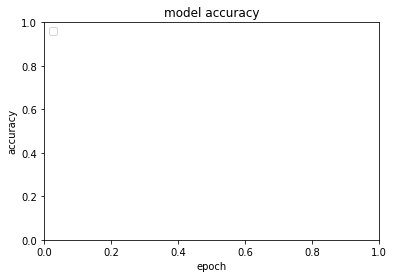

In [31]:
from matplotlib import pyplot as plt
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
batch_c = test.as_numpy_iterator().next()

In [33]:
masukan_text = kalimat('Kamu Kontol')

In [34]:
model.predict(np.expand_dims(masukan_text,0))

array([[0.81665707, 0.38004982, 0.00188857, 0.98233867]], dtype=float32)

In [35]:
# save model in h5 format
model.save('anticede_model.h5')

In [36]:
# convert file ke format .pb
import os

model_version = "1"
model_save = "anticede"
model_path = os.path.join(model_save, model_version)
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: anticede/1/assets


INFO:tensorflow:Assets written to: anticede/1/assets


In [37]:
!zip -r log.zip log /content/anticede

	zip warning: name not matched: log
  adding: content/anticede/ (stored 0%)
  adding: content/anticede/1/ (stored 0%)
  adding: content/anticede/1/assets/ (stored 0%)
  adding: content/anticede/1/saved_model.pb (deflated 90%)
  adding: content/anticede/1/variables/ (stored 0%)
  adding: content/anticede/1/variables/variables.index (deflated 68%)
  adding: content/anticede/1/variables/variables.data-00000-of-00001 (deflated 19%)
